# Customer Churn Prediction – Exploratory Data Analysis


This notebook covers initial data loading and exploratory analysis for a customer churn prediction problem.


### 1. Data Loading


In [251]:
import numpy as np 
import pandas as pd 
df = pd.read_excel("data/Telco_customer_churn.xlsx")
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


## 2. Dataset Overview


In [253]:
df.shape

(7043, 33)

In [254]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

## 3. Target Variable Analysis


In [257]:
df.head(1)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer


In [258]:
df['Churn Label'].value_counts()

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

In [259]:
(1869/(1869+5174))*100

26.536987079369588

### Target Variable Insight

The dataset shows class imbalance, with significantly fewer churned customers compared to non-churned customers.
Due to this imbalance, accuracy alone may be misleading.
Hence, evaluation metrics such as Recall, F1-score, and ROC-AUC will be more appropriate for this problem.


## 4. Univariate Analysis

In [262]:
# Tenure month 
import matplotlib.pyplot as plt 
import seaborn as sns

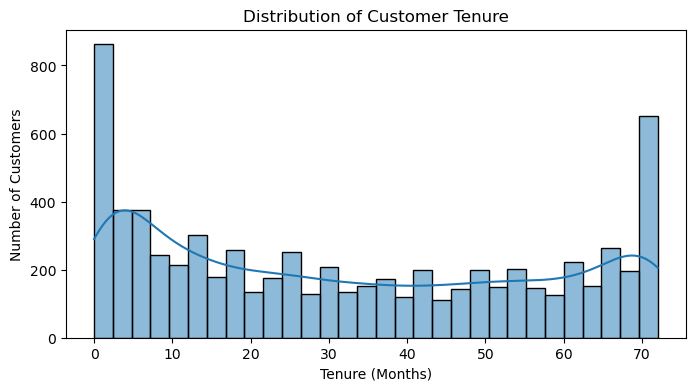

In [263]:
plt.figure(figsize=(8,4))
sns.histplot(df['Tenure Months'], bins=30, kde=True)
plt.title("Distribution of Customer Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")
plt.show()

### Tenure Distribution Insight

The tenure distribution shows a high concentration of customers in the early months, indicating that a significant number of customers leave shortly after joining.
Another noticeable concentration appears at higher tenure values, suggesting that customers who remain beyond the initial period tend to stay for a long duration.
This bimodal pattern highlights the early customer lifecycle as a critical phase for churn prevention.

Many customer leave very eraly or stay for longer time

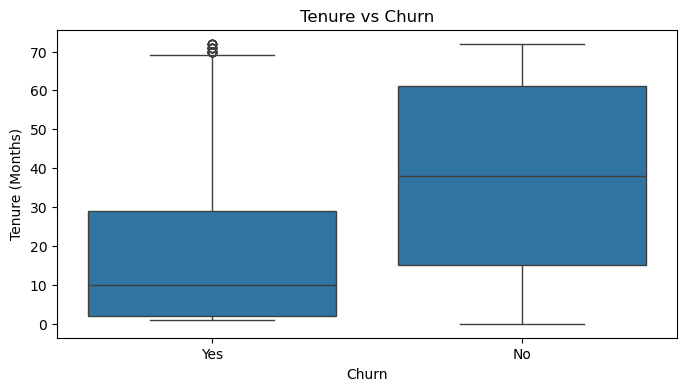

In [268]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Churn Label', y='Tenure Months', data=df)
plt.title("Tenure vs Churn")
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")
plt.show()


### Tenure vs Churn Insight

The median tenure of churned customers is relatively low, indicating that churn tends to occur earlier in the customer lifecycle.
Additionally, customers with higher tenure show a lower tendency to churn, although some high-tenure customers still exit the platform.


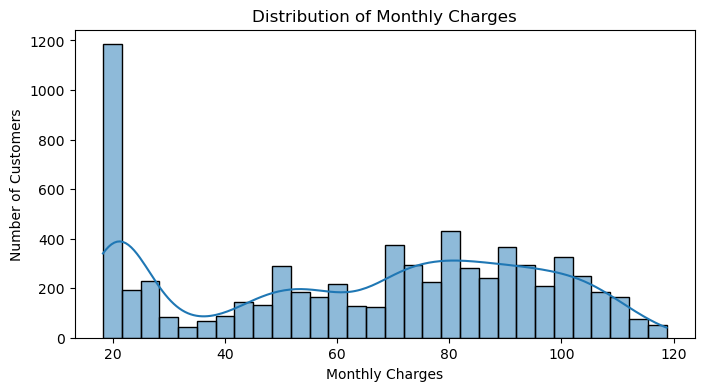

In [275]:
plt.figure(figsize=(8,4))
sns.histplot(df['Monthly Charges'], bins=30, kde=True)
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.show()

### Monthly Charges Distribution Insight

The distribution of monthly charges shows multiple customer segments, with a large number of customers on lower-cost plans and a broad spread of customers on mid to high-priced plans.
This indicates the presence of different service tiers within the customer base.


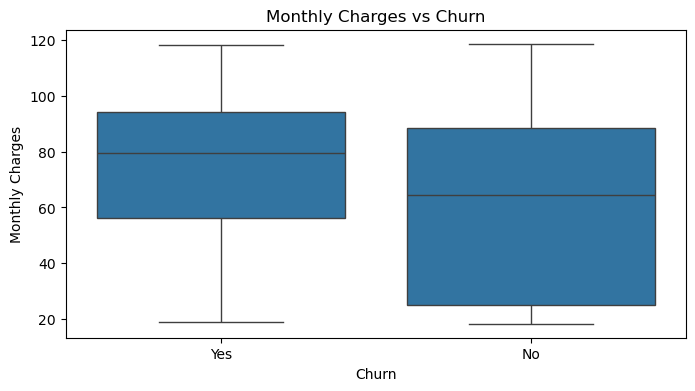

In [280]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Churn Label', y='Monthly Charges', data=df)
plt.title("Monthly Charges vs Churn")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()

### Monthly Charges vs Churn

The boxplot shows that customers who churn generally pay higher monthly charges compared to customers who stay.
However, there is a wide overlap between the two groups, which means that not all high-paying customers leave and some low-paying customers also churn.
This indicates that monthly charges influence churn, but they are not the only factor, and other features such as contract type and tenure also play an important role.


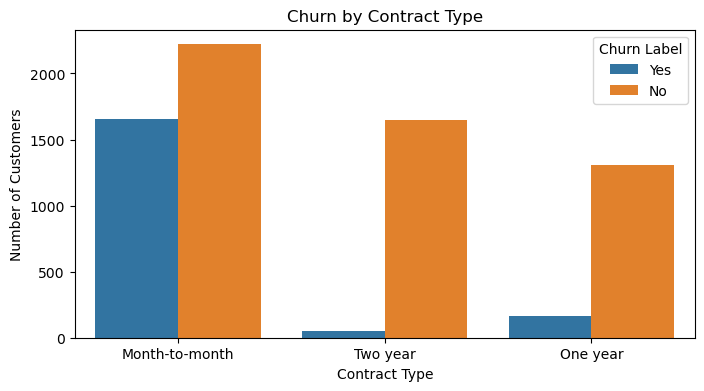

In [283]:
plt.figure(figsize=(8,4))
sns.countplot(df,x='Contract',hue='Churn Label')
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.show()

In [285]:
contract_churn_rate = (
    df.groupby('Contract')['Churn Label']
      .value_counts(normalize=True)
      .rename('proportion')
      .reset_index()
)

contract_churn_rate[contract_churn_rate['Churn Label'] == 'Yes']


,Contract,Churn Label,proportion
1,Month-to-month,Yes,0.427097
3,One year,Yes,0.112695
5,Two year,Yes,0.028319


### Contract vs Churn Insight

Customers on month-to-month contracts show a significantly higher churn rate compared to customers on one-year and two-year contracts.

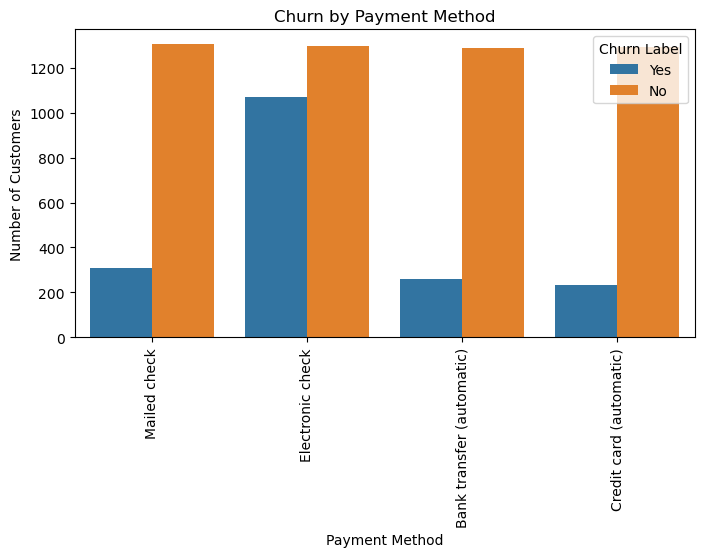

In [288]:
plt.figure(figsize=(8,4))
sns.countplot(df,x='Payment Method',hue='Churn Label')
plt.xticks(rotation=90)
plt.title("Churn by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Number of Customers")
plt.show()

In [289]:
df[df['Churn Label']=='Yes']['Payment Method'].value_counts()

Payment Method
Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: count, dtype: int64

In [292]:
df[df['Churn Label']=='No']['Payment Method'].value_counts()

Payment Method
Mailed check                 1304
Electronic check             1294
Credit card (automatic)      1290
Bank transfer (automatic)    1286
Name: count, dtype: int64

### Payment Method vs Churn Insight

The chart shows that customers using **electronic check** have a much higher number of churned customers compared to other payment methods.
Customers who use **automatic payment methods** such as bank transfer or credit card tend to churn less.
This suggests that customers with automated payments are more stable, while manual payment methods are associated with higher churn.


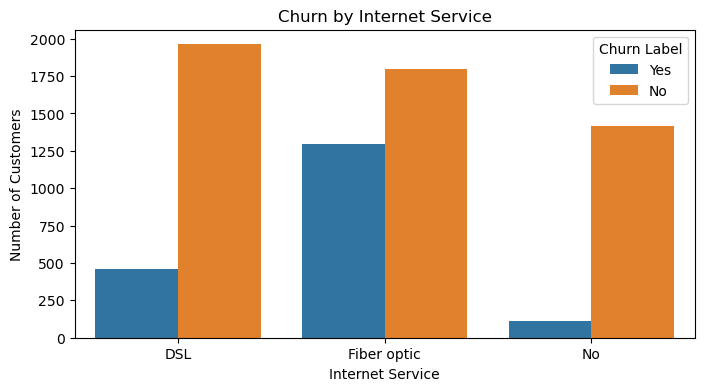

In [295]:
plt.figure(figsize=(8,4))
sns.countplot(df,x='Internet Service',hue='Churn Label')
plt.title("Churn by Internet Service")
plt.xlabel("Internet Service")
plt.ylabel("Number of Customers")
plt.show()

In [297]:
df['Internet Service'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

### Internet Service vs Churn Insight

The chart shows that customers using **fiber optic internet** have a much higher number of churned customers compared to those using DSL.
Customers with **no internet service** show the lowest churn, indicating they are more stable.
This suggests that churn is more common among customers with higher-end internet services, possibly due to higher costs or service expectations.


### Note on Add-on Service Features

Several add-on service features such as Online Security, Online Backup, Tech Support, Streaming TV, Streaming Movies, and Device Protection were not individually analyzed during EDA.
These features are highly correlated with internet service type and tend to exhibit similar churn patterns.
To avoid redundancy and keep the analysis focused, they are included directly in the modeling stage rather than being explored individually.


# Feature Engineering and preprocessing 

In [302]:
import pandas as pd
import numpy as np
df = pd.read_excel("data/Telco_customer_churn.xlsx")

leakage_cols = [
    'CustomerID',
    'Churn Label',
    'Churn Score',
    'Churn Reason'
]

df_model = df.drop(columns=leakage_cols)
df_model['Total Charges'] = pd.to_numeric(
    df_model['Total Charges'], errors='coerce'
)



In [304]:
y=df_model.pop('Churn Value')
df_model=df[[
    "Tenure Months",
    "Monthly Charges",
    "Contract",
    "Internet Service",
    "Payment Method"
]]


In [308]:
X=df_model.copy()

In [310]:
num_cols = ["Tenure Months", "Monthly Charges"]
cat_cols = ["Contract", "Internet Service", "Payment Method"]

In [312]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [314]:
def to_str_transformer(x):
    return x.astype(str)

In [316]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('to_str', FunctionTransformer(to_str_transformer)),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ]
)


In [318]:
from sklearn.linear_model import LogisticRegression

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        max_iter=1000,
        class_weight='balanced'
    ))
])

In [320]:
model.fit(X_train,y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [321]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[739 296]
 [ 75 299]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1035
           1       0.50      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409



In [324]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

In [326]:
models={
    'Logistic Regression':LogisticRegression(),
    'Decision Tree':DecisionTreeClassifier(),'Random Forest':RandomForestClassifier(),'Gradient Boosting':GradientBoostingClassifier(),
    'SVM':LinearSVC()
}

In [328]:
for name,clf in models.items():
    pipe=Pipeline(steps=[
        ('preprocessor',preprocessor),('clf',clf)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test) 
    print(f"\n===== {name} =====")
    print(classification_report(y_test, y_pred))


===== Logistic Regression =====
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409


===== Decision Tree =====
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1035
           1       0.48      0.48      0.48       374

    accuracy                           0.72      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.72      0.72      0.72      1409


===== Random Forest =====
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1035
           1       0.55      0.49      0.52       374

    accuracy                           0.76      1409
   macro avg       0.68      0.67      0.

Higher F1-Score for Churned Customers (Class = 1)
The F1-score balances precision and recall, ensuring the model does not over-predict churn while still capturing a reasonable number of churned customers.

Controlled Recall for Churn (Not Maximized)
Extremely high recall can lead to many false positives. Therefore, models with moderate recall and better precision balance were preferred.

Overall Generalization Performance
Models showing stable performance on unseen test data without overfitting were prioritized.

Model Complexity vs. Performance Gain
Models providing meaningful performance improvement without unnecessary complexity were favored.

In [330]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

gb_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])


In [331]:
param_grid_gb = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.05, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5],
    'classifier__min_samples_leaf': [20, 50, 100]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rand_gb = RandomizedSearchCV(
    estimator=gb_pipe,
    param_distributions=param_grid_gb,
    n_iter=25,
    scoring='f1',
    cv=5,
    random_state=42,
    n_jobs=-1
)

rand_gb.fit(X_train, y_train)


In [ ]:
print("Best Parameters:")
print(rand_gb.best_params_)

print("\nBest CV F1-score:")
print(rand_gb.best_score_)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

best_gb_model = rand_gb.best_estimator_

y_pred_gb = best_gb_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


In [ ]:
from sklearn.metrics import roc_auc_score 
roc_auc=roc_auc_score(y_test,y_pred_gb)
print("ROC AUC Score is:",roc_auc)

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')  # random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_curve, auc

# Probabilities (important)
y_proba = best_gb_model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_gb)
pr_auc = auc(recall, precision)

print("PR-AUC:", pr_auc)

# Baseline PR-AUC = churn rate
baseline_pr = y_test.mean()
print("Baseline PR-AUC (random):", baseline_pr)


In [ ]:
threshold=[0.1,0.2,0.3,0.4,0.5,0.6,0.7] 
y_probablity=best_gb_model.predict_proba(X_test)[:,1]

In [ ]:
for i in threshold: 
    print("For threshold=",i)
    y_pred = (y_proba >= i).astype(int)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    

The objective is to choose a threshold that captures most churners (high recall) while keeping false positives under control (balanced precision).

# Feature Importance

In [ ]:
# feature_importance=pd.Series(best_gb_model.feature_importances_,index=X_train.columns).sort_values(ascending=False)

In [ ]:
best_gb_model


In [ ]:
best_gb_model.named_steps

In [ ]:
best_gb_model.named_steps['classifier']

In [ ]:
# feature_importance=pd.Series(best_gb_model.named_steps['classifier'].feature_importances_,index=X_train.columns).sort_values(ascending=False)

In [ ]:
gb_model = best_gb_model.named_steps['classifier']

In [ ]:
# preprocessor = best_gb_model.named_steps['preprocessor']
# feature_names = preprocessor.get_feature_names_out()

In [ ]:
preprocessor = best_gb_model.named_steps['preprocessor']

In [ ]:
feature_names = []

for name, transformer, columns in preprocessor.transformers_:
    if transformer == 'drop':
        continue

    # If transformer is a pipeline, take the last step
    if hasattr(transformer, 'named_steps'):
        last_step = list(transformer.named_steps.values())[-1]
    else:
        last_step = transformer

    if hasattr(last_step, 'get_feature_names_out'):
        names = last_step.get_feature_names_out(columns)
    else:
        names = columns  # numerical columns usually fall here

    feature_names.extend(names)


In [ ]:
gb_model = best_gb_model.named_steps['classifier']

import pandas as pd
feature_importance = pd.Series(
    gb_model.feature_importances_,
    index=feature_names
).sort_values(ascending=False)

feature_importance.head(15)


### Challenge: Feature Importance with Pipelines

Since the model was trained using a Pipeline with a ColumnTransformer and OneHotEncoder,
extracting feature importance is non-trivial.

Challenges:
- `Pipeline` objects do not expose `feature_importances_` directly
- One-hot encoding expands categorical variables into many features
- Some transformers do not support `get_feature_names_out()`

To address this, feature names were reconstructed manually from the preprocessing steps.


# Shap

In [ ]:
import shap

In [ ]:
gb_model = best_gb_model.named_steps['classifier']
preprocessor = best_gb_model.named_steps['preprocessor']

In [ ]:
# Transforming  data as gradient bossting classifier learn from these data
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed  = preprocessor.transform(X_test)

In [ ]:
import numpy as np

X_test_transformed_dense = X_test_transformed.toarray() \
    if hasattr(X_test_transformed, "toarray") else np.asarray(X_test_transformed, dtype=float)


In [ ]:
X_train_transformed_dense = X_train_transformed.toarray() \
    if hasattr(X_train_transformed, "toarray") else np.asarray(X_train_transformed, dtype=float)


### SHAP Explainability

SHAP (SHapley Additive exPlanations) is used to interpret the predictions of the Gradient Boosting model by quantifying the contribution of each feature to the final churn prediction.

It provides:
- **Global explanations**, identifying the most important features influencing churn across all customers.
- **Local explanations**, explaining why a specific customer is predicted to churn by showing feature-level impact.

SHAP values are based on game-theoretic principles and represent how each feature increases or decreases the predicted churn risk.  
Positive SHAP values push the prediction toward churn, while negative values reduce churn risk.

**Technical Note:**  
SHAP requires numeric, dense input data. Since the preprocessing pipeline outputs a sparse or object-type matrix after encoding, the transformed feature matrix was converted into a dense numeric array before applying SHAP. This conversion does not affect model predictions and is performed only for explainability purposes.


In [ ]:
explainer = shap.TreeExplainer(gb_model)
# shap_values = explainer.shap_values(X_test_transformed) ->error 
shap_values=explainer.shap_values(X_test_transformed_dense)

In [ ]:
shap.summary_plot(
    shap_values,
    X_test_transformed,
    feature_names=feature_names
)


# Error Analysis

In [ ]:
y_pred = (y_proba >= 0.3).astype(int)

In [ ]:
false_negatives = X_test[(y_test == 1) & (y_pred == 0)]
false_negatives.shape


In [ ]:
false_positives = X_test[(y_test == 0) & (y_pred == 1)]
false_positives.shape


In [ ]:
import joblib

joblib.dump(best_gb_model, "churn_model.pkl")
joblib.dump(0.3, "decision_threshold.pkl")

# Business Recommendations

Based on feature importance, SHAP analysis, and error analysis, the following business actions are recommended to reduce customer churn.

### 1. Prioritize Early-Tenure Customers
Customers with shorter tenure show the highest churn risk.
- Provide proactive onboarding during the first 3–6 months
- Offer welcome discounts or loyalty benefits early
- Assign dedicated support for new customers

### 2. Target Fiber Optic Service Users
Fiber optic customers exhibit higher churn probability, likely due to higher expectations.
- Monitor service quality and complaint frequency
- Offer priority support and service guarantees
- Run targeted satisfaction surveys for this segment

### 3. Address High-Risk Payment Methods
Customers using electronic check payments are more likely to churn.
- Incentivize switching to auto-pay or card payments
- Provide small discounts for stable payment methods

### 4. Encourage Long-Term Contracts
Month-to-month contracts are strongly associated with churn.
- Promote one-year and two-year plans with bundled discounts
- Offer contract upgrades to high-risk customers before renewal

### 5. Cost-Sensitive Retention for High Charges
Customers with higher monthly charges are more likely to churn.
- Introduce personalized pricing or bundled plans
- Offer temporary discounts instead of flat price cuts

### 6. Model-Driven Retention Strategy
Retention campaigns should be **selective**, not mass-based.
- Target customers with predicted churn probability ≥ 0.3
- Avoid unnecessary outreach to low-risk customers
- Balance recall and precision to maximize retention impact

### Summary
By focusing on early-tenure customers, high-cost service users, unstable payment behaviors, and short-term contracts, the organization can proactively reduce churn while keeping retention costs under control.


# Final Conclusion

A Gradient Boosting model with threshold tuning was developed to predict customer churn.
The model achieved strong PR-AUC performance and prioritized recall to minimize missed churners.
Explainability techniques (feature importance and SHAP) validated that tenure, contract type,
payment method, and service type are the primary churn drivers.
The final model enables targeted retention strategies with a clear trade-off between recall
and outreach cost, making it suitable for real-world deployment.


In [ ]:
joblib.load('')